# BAD Day 1: Tutorial  

# 0. Source/install the needed packages


In [1]:
# In case you need to install the packages
 install.packages("xlsx")
 install.packages("gdata")
 install.packages("ape")


The downloaded binary packages are in
	/var/folders/1q/xdx6qpy905dbx01t7cfv36280000gn/T//RtmpMbXbxh/downloaded_packages

The downloaded binary packages are in
	/var/folders/1q/xdx6qpy905dbx01t7cfv36280000gn/T//RtmpMbXbxh/downloaded_packages

The downloaded binary packages are in
	/var/folders/1q/xdx6qpy905dbx01t7cfv36280000gn/T//RtmpMbXbxh/downloaded_packages


In [2]:
source("http://bioconductor.org/biocLite.R");
biocLite("multtest");

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘multtest’



The downloaded binary packages are in
	/var/folders/1q/xdx6qpy905dbx01t7cfv36280000gn/T//RtmpMbXbxh/downloaded_packages


Old packages: 'backports', 'devtools', 'jsonlite', 'knitr', 'pbdZMQ', 'R6',
  'Rcpp', 'RcppArmadillo', 'tibble', 'tidyr'



# 1. Exploratory data analysis

We will be usig the Gene Expression dataset from **Golub et al (1999)**. The gene expression data collected by Golub et al. (1999) are among the most classical in bioinformatics. A selection of the set is called `golub` which is contained in the `multtest` package loaded before. 


The data consist of gene expression values of 3051 genes (rows) from 38 leukemia patients Pre-processing was done as described in Dudoit et al. (2002). The R code for pre-processing is available in the file ../doc/golub.R.

**Source**: 
Golub et al. (1999). Molecular classification of cancer: class discovery and class prediction by gene expression monitoring, Science, Vol. 286:531-537. (http://www-genome.wi.mit.edu/MPR/).

In [3]:
require(multtest);

# Usage
data(golub);

# If you need more information on the data set just
# uncomment the line below
# ?golub

Loading required package: multtest
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory mate

Data set values:
- `golub`: matrix of gene expression levels for the 38 tumor mRNA samples, rows correspond to genes (3051 genes) and columns to mRNA samples.
- `golub.cl`: numeric vector indicating the tumor class, 27 acute lymphoblastic leukemia (ALL) cases (code 0) and 11 acute myeloid leukemia (AML) cases (code 1).
- `golub.names`: a matrix containing the names of the 3051 genes for the expression matrix golub. The three columns correspond to the gene index, ID, and Name, respectively.

In [4]:
# Checking the dimension of the data
dim(golub)

[1] 3051   38

In [5]:
# we will have a look at the first rows contained in the data set
head(golub)

-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


The gene names are collected in the matrix `golub.gnames` of which the columns correspond to the gene index, ID, and Name, respectively.

In [6]:
# Adding 3051 gene names
row.names(golub) = golub.gnames[,3]

head(golub)

AFFX-HUMISGF3A/M97935_MA_at,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
AFFX-HUMISGF3A/M97935_MB_at,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
AFFX-HUMRGE/M10098_5_at,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
AFFX-HUMRGE/M10098_M_at,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
AFFX-HUMRGE/M10098_3_at,2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


In [7]:
# Let's just have a look at the top 20 genes ID's contained in golub.gnames
head(golub.gnames[,2], n = 20)

[1] "AFFX-HUMISGF3A/M97935_MA_at (endogenous control)"
 [2] "AFFX-HUMISGF3A/M97935_MB_at (endogenous control)"
 [3] "AFFX-HUMISGF3A/M97935_3_at (endogenous control)" 
 [4] "AFFX-HUMRGE/M10098_5_at (endogenous control)"    
 [5] "AFFX-HUMRGE/M10098_M_at (endogenous control)"    
 [6] "AFFX-HUMRGE/M10098_3_at (endogenous control)"    
 [7] "AFFX-HUMGAPDH/M33197_5_at (endogenous control)"  
 [8] "AFFX-HUMGAPDH/M33197_M_at (endogenous control)"  
 [9] "AFFX-HSAC07/X00351_5_at (endogenous control)"    
[10] "AFFX-HSAC07/X00351_M_at (endogenous control)"    
[11] "AFFX-HUMTFRR/M11507_5_at (endogenous control)"   
[12] "AFFX-HUMTFRR/M11507_M_at (endogenous control)"   
[13] "AFFX-HUMTFRR/M11507_3_at (endogenous control)"   
[14] "AFFX-M27830_5_at (endogenous control)"           
[15] "AFFX-M27830_M_at (endogenous control)"           
[16] "AFFX-M27830_3_at (endogenous control)"           
[17] "AFFX-HSAC07/X00351_3_st (endogenous control)"    
[18] "AFFX-HUMGAPDH/M33197_M_st (endogenous control)"  
[19] "AFFX-HUMGAPDH/M33197_3_st (endogenous control)"  
[20] "AFFX-HSAC07/X00351_M_st (endogenous control)"

Twenty-seven patients are diagnosed as acute lymphoblastic leukemia (ALL) and eleven as acute myeloid leukemia (AML). The tumor class is given by the numeric vector golub.cl, where ALL is indicated by 0 and AML by 1. 

In [8]:
colnames(golub) = golub.cl

head(golub)

,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
AFFX-HUMISGF3A/M97935_MA_at,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
AFFX-HUMISGF3A/M97935_MB_at,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
AFFX-HUMRGE/M10098_5_at,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
AFFX-HUMRGE/M10098_M_at,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
AFFX-HUMRGE/M10098_3_at,2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


Note that sometimes it is better to construct a factor which indicates the tumor class of the patients. Such a factor could be used for instance to separate the tumor groups for plotting purposes.  The factor (`gol.fac`) can be contructed as follows.

In [9]:
gol.fac <-  factor(golub.cl, levels = 0:1, labels = c("AML", "ALL"))

The labels correspond to the two tumor classes. The evaluation of gol.fac=="ALL" returns
TRUE for the first twenty-seven values and FALSE for the remaining eleven,
which is useful as a column index for selecting the expression values of the
ALL patients. The expression values of gene CCND3 Cyclin D3 from the
ALL patients can now be printed to the screen, as follows.

In [10]:
golub[1042, gol.fac == "ALL"]

1        1        1        1        1        1        1        1 
 0.88941  1.45014  0.42904  0.82667  0.63637  1.02250  0.12758 -0.74333 
       1        1        1 
 0.73784  0.49470  1.12058

## Creating the exploratory plots

### 1.1\. Plotting the value of gene (CCND3) in all nRNA samples (M92287_at)

We shall first have a look at the expression values of a gener with manufacurer name `M92278_at`, which is known in biology as "CCND3 Cyclin D3".

The expression values of this gene are collected in row 1042 of golub. To load the data and to obtain the relevant information from row 1042 of golub.gnames, use the following:

In [11]:
mygene <- golub[1042, ]

The data has now been stored in the `golub` matrix. We will now plot the expression values od the gene CCND3 Cyclin D3.

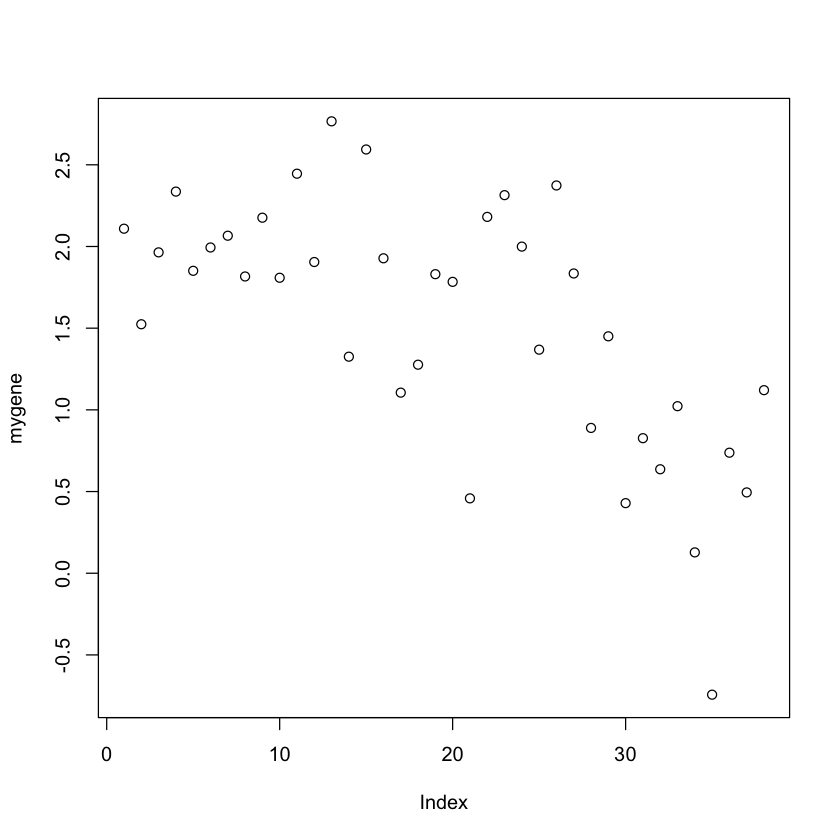

In [12]:
plot(mygene)

In the previous plot we just used the default plotting preferences within R base plotting.We can do some improvements so that the plot is easily understood.

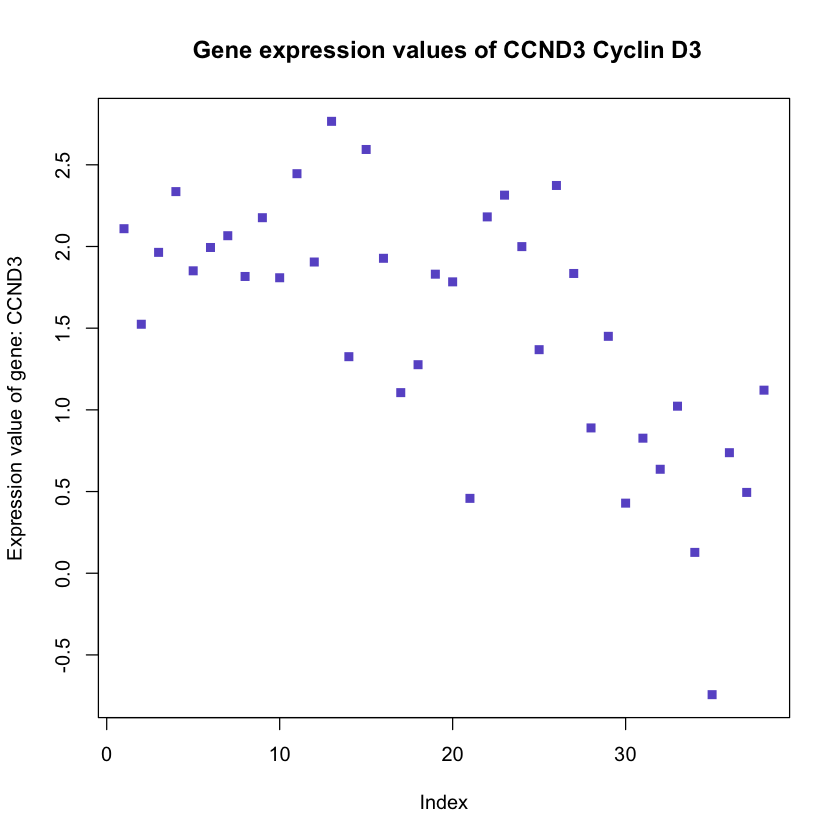

In [13]:
plot(mygene, pch = 15, col = 'slateblue', ylab = 'Expression value of gene: CCND3', 
    main = ' Gene expression values of CCND3 Cyclin D3')

In this plot the vertical axis corresponds to the size of the expression values and the horizontal axis the index of the patients. 

### 1.2\. Gene expression between patient 1 (ALL) and patient 38 (AML) 

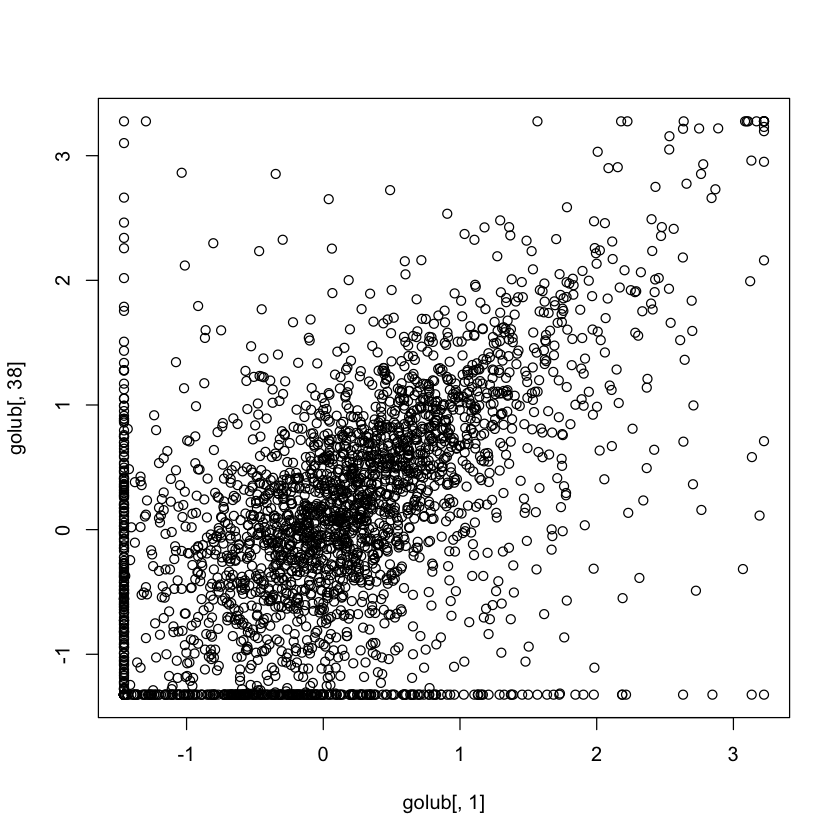

In [14]:
plot(golub[,1], golub[,38])

Adding diagonal lines to the plot and changing axes labels


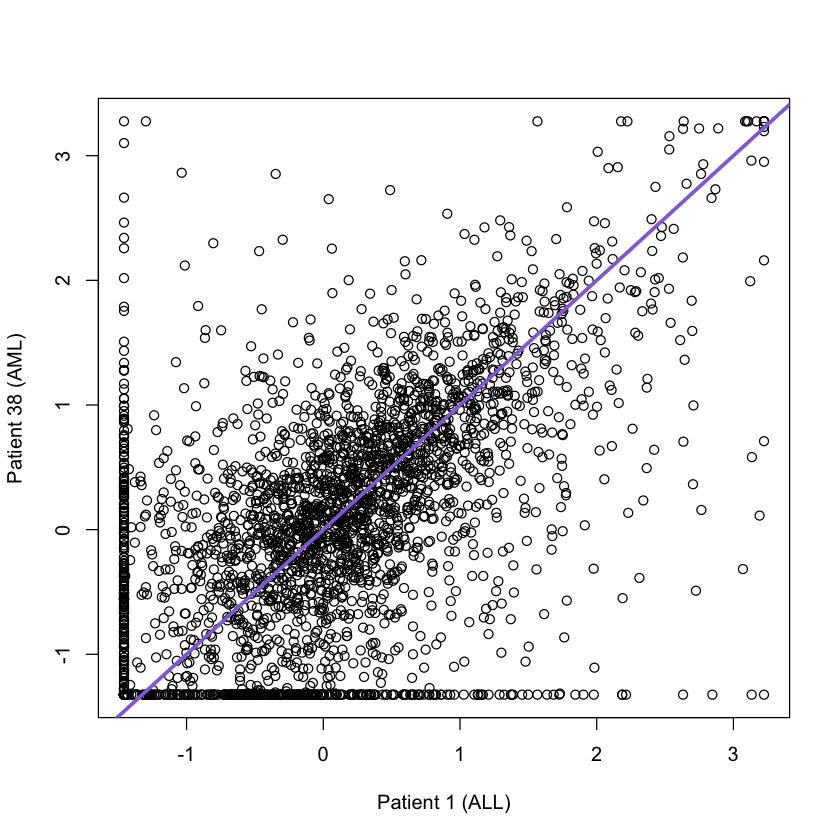

In [15]:
plot(golub[,1], golub[,38], xlab = 'Patient 1 (ALL)', ylab = 'Patient 38 (AML)') 
abline(a = 0, b = 1, col = 'mediumpurple', lwd =3)

### 1.3\. Scatter plots to detect independence


In [16]:
mysamplist <- golub[, c(1:15)]
colnames(mysamplist) = c(1:15)

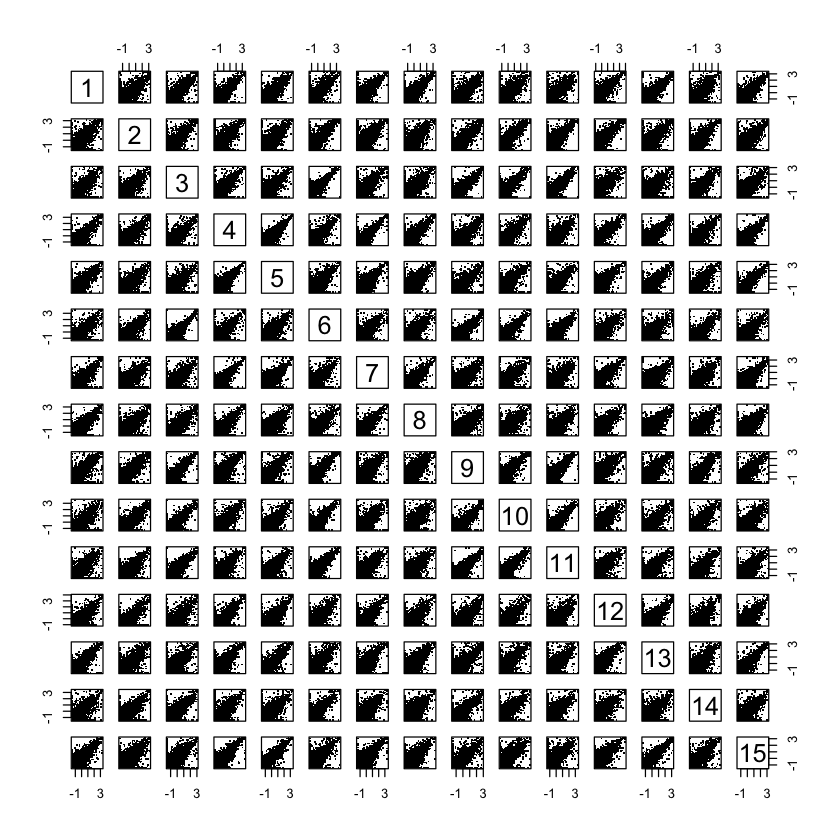

In [17]:
plot(as.data.frame(mysamplist), pch='.')

### 1.4\. Bar plot of 4 cyclin genes expression values in 3 ALL and AML patients

We will analyse the expression values of the `D13639_at, M92287_at, U11791_at, Z36714_AT` genes in three chosen AML and ALL patients

In [18]:
mygenelist <- golub[c(85, 1042, 1212, 2240), c(1:3, 36:38)]

# having a look at the data set chosen
mygenelist

,0,0,0,1,1,1
D13639_at,2.09511,1.71953,-1.46227,-0.92935,-0.11091,1.15591
M92287_at,2.10892,1.52405,1.96403,0.73784,0.49470,1.12058
U11791_at,-0.11439,-0.72887,-0.39674,-0.94364,0.05047,0.05905
Z36714_at,-1.45769,-1.39420,-1.46227,-1.39906,-1.34579,-1.32403


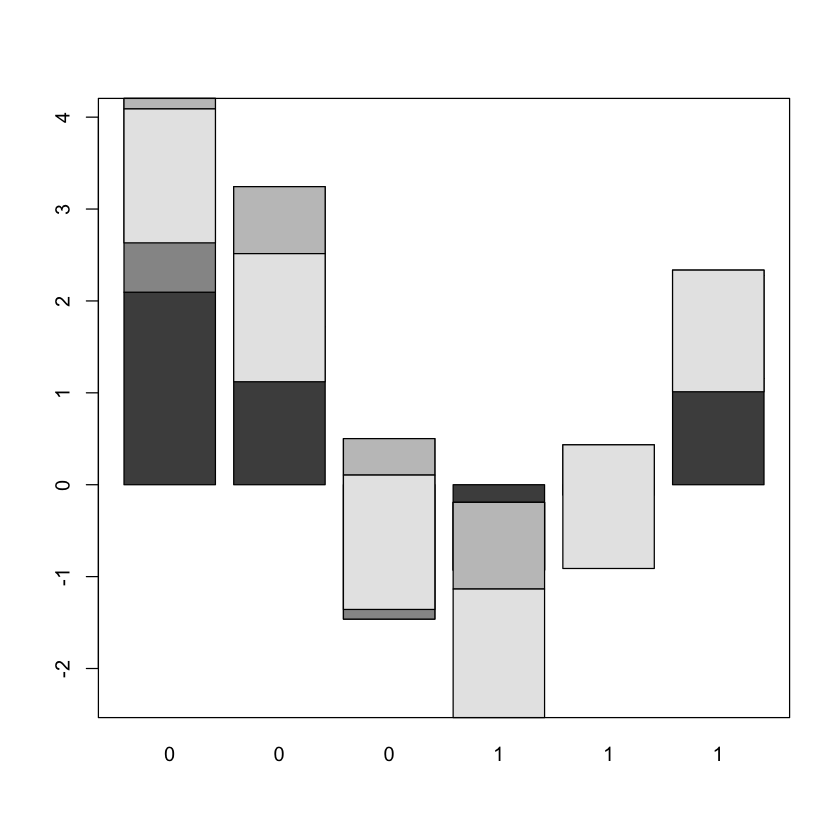

In [19]:
barplot(mygenelist)
box()

The plot is not very easy to read, so we will add some colours and a legend so that we know which gene each bar segment corresponds to.


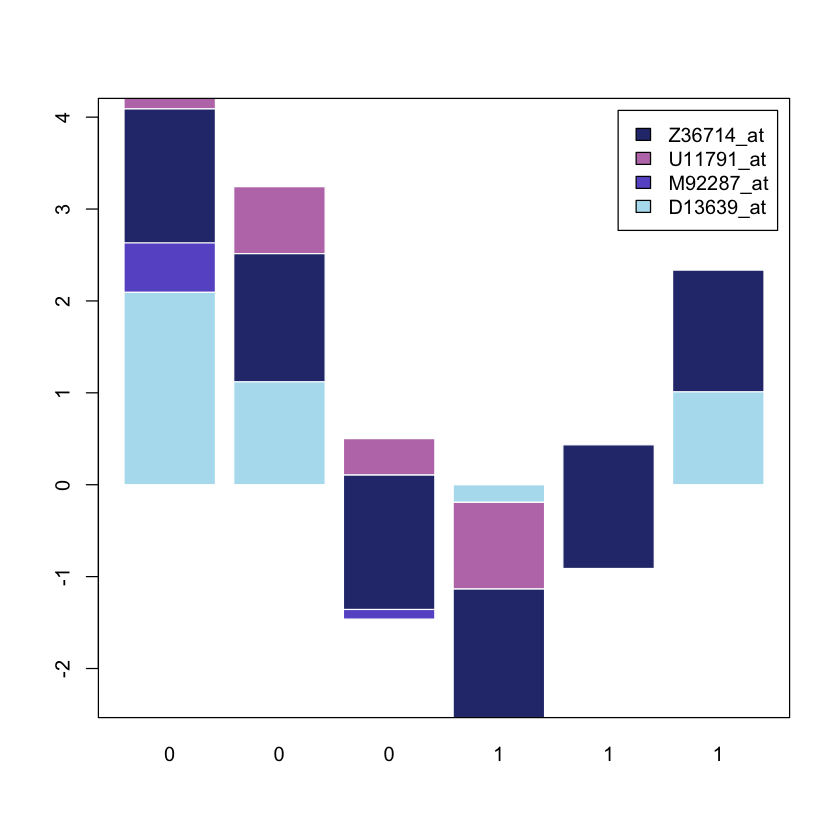

In [20]:
# custom colours 
colours = c('lightblue2',   'slateblue', '#BD7BB8', '#2B377A')

barplot(mygenelist, col = colours, legend = TRUE, border = 'white')
box()

In this case the patients are indicated on the `X` axis (0 and 1 respectively) while the gene expression level is indicate on the `Y` axis. 

We can make some improvements to the plots.
Let's have a look at the `barplot` arguments:

In [21]:
?barplot

We are going to focus on only a few of the histgram arguments:
- `beside`: `TRUE` for the bars to be displayed as justapoxed bars, `FALSE` for stacked bars
- `horiz` : `FALSE` bars displayed vertically with the first bar to the left, `TRUE` bars are displayed horizontally with the first at the bottom.
- `ylim`, `xlim` :  limits for the y and x axes
- `col`: colour choices

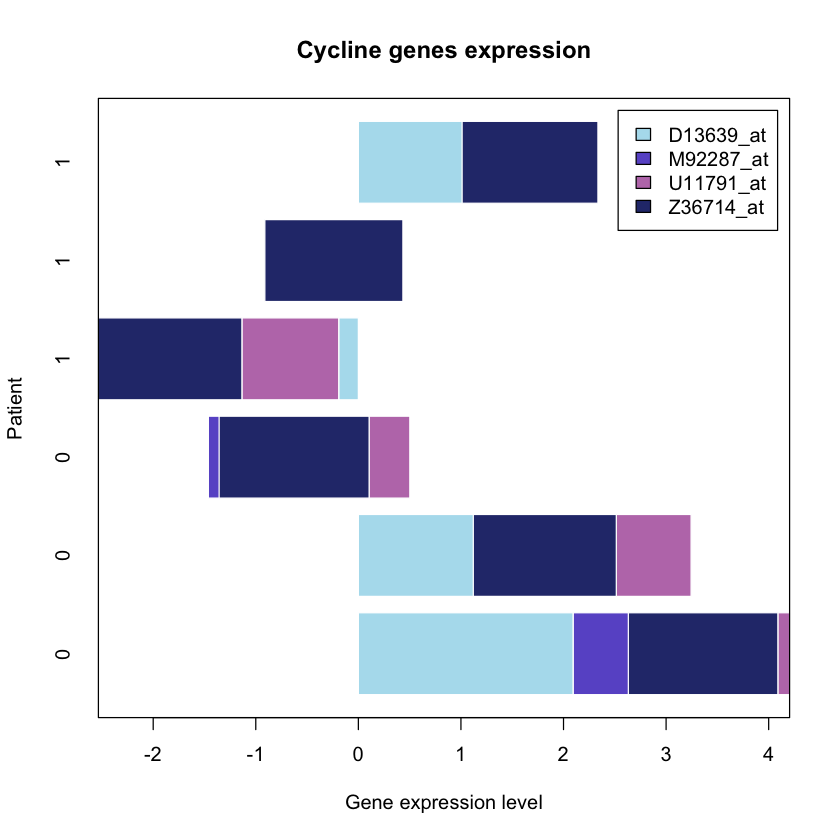

In [22]:
barplot(mygenelist, horiz = TRUE, col = colours, legend = TRUE,
       ylab = 'Patient', border = 'white', 
        xlab = 'Gene expression level', main  = 'Cycline genes expression')
box()

In the plot above we presented the barplots horizontally and added some colours, which makes it easier to understand the data presented.
You can also use the barplots to represent the mean and standard error which we will be doing in the following sections.

### 1.5\. Plotting the mean

In the following we will compute the mean for the expression values of both the ALL and AML patients. We will be using the same 4 cycline genes used in the example above.

First we will compute the ALL and AML for all the patients. Once the means are computed they are combined into a single data frame. 

Finally, the means are plotted using the `barplot` function.

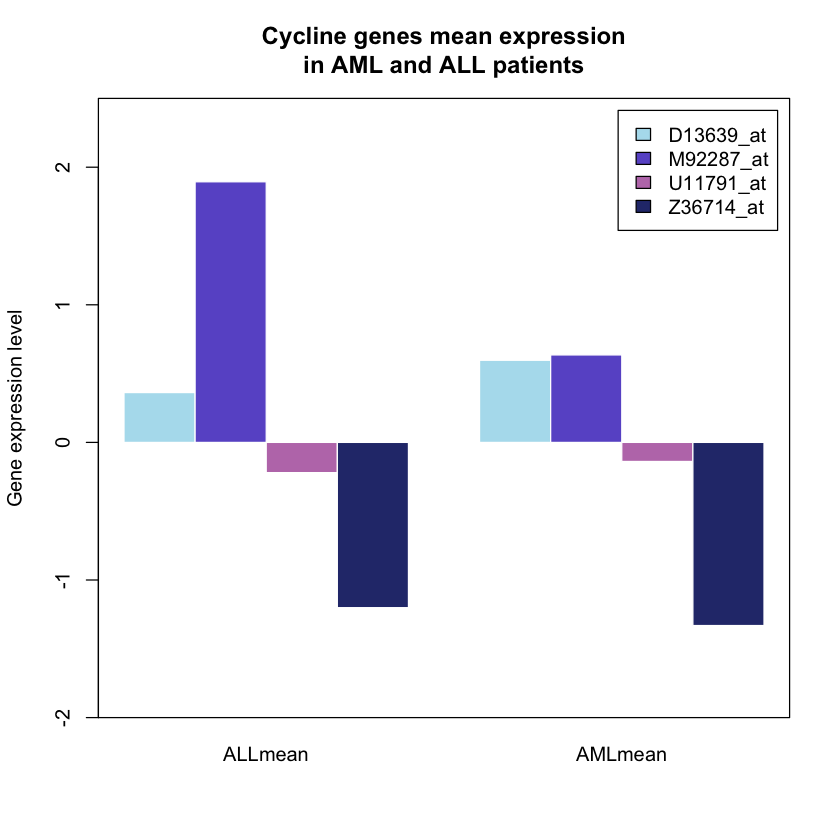

In [23]:
# Calculating the mean of the chosen genes from patient 1 to 27 and 28 to 38
ALLmean <- rowMeans(golub[c(85,1042,1212,2240),c(1:27)])
AMLmean <- rowMeans(golub[c(85,1042,1212,2240),c(28:38)])

# Combining the mean matrices previously calculated
dataheight <- cbind(ALLmean, AMLmean)

# Plotting 
barx <- barplot(dataheight, beside=T, horiz=F, col= colours, ylim=c(-2,2.5),
                legend = TRUE,border = 'white' ,
                ylab = 'Gene expression level', main = 'Cycline genes mean expression
in AML and ALL patients')
box()

### 1.6\. Adding error bars to the previous plot


In the previous section we computed the mean expression level for 4 cycline genes between the AML and ALL patients. Sometimes it is useful to add error bars to the plots (as the one above) to convey the uncertainty in the data presented. 

For such a purpose we often use the **Standard Deviation**:


$$ \sigma = \sqrt{\frac{\sum_{i=1}^{n}\left(x_i -\mu \right)^2}{N}}$$


which in turn tells us how much the values in a certain group tend to deviate from their mean value. 

Let's start calculating the Standard Deviation of the data.



In [24]:
# Calculating the SD
ALLsd <- apply(golub[c(85,1042,1212,2240),c(1:27)], 1, sd)
nALL=length(c(1:27))
AMLsd <- apply(golub[c(85,1042,1212,2240),c(28:38)], 1, sd)
nAML=length(c(28:38))

# Combining the data
datasd <- cbind(ALLsd, AMLsd)



Another measure used to quantify the deviation is the **standard error**, which qutifies the variability in the **_means_** of our groups instead of reporting the variability among the data points.

A relatively straigtforward way to compute this is by assuming if we were to repeat a  given experiment many many times, then it would roughly follow a normal distribution. **Note – this is a big assumption**.  hence, if we assuemt hat the means follow a nosmal distribution, then the standard error (_a.k.a. variability of group means_) can be defined as:

$$ SE  = \frac{SD}{\sqrt{n}} $$

which in layman terms can be read as  “take the general variability of the points around their group means (the standard deviation), and scale this number by the number of points that you’ve collected”. 

Since we have already computed the SD we can now compute the standard error (SE).

In [25]:
datase <- cbind(ALLsd/sqrt(nALL), AMLsd/sqrt(nAML))

Now we can create a plot of the mean data as well as the SE and SD.

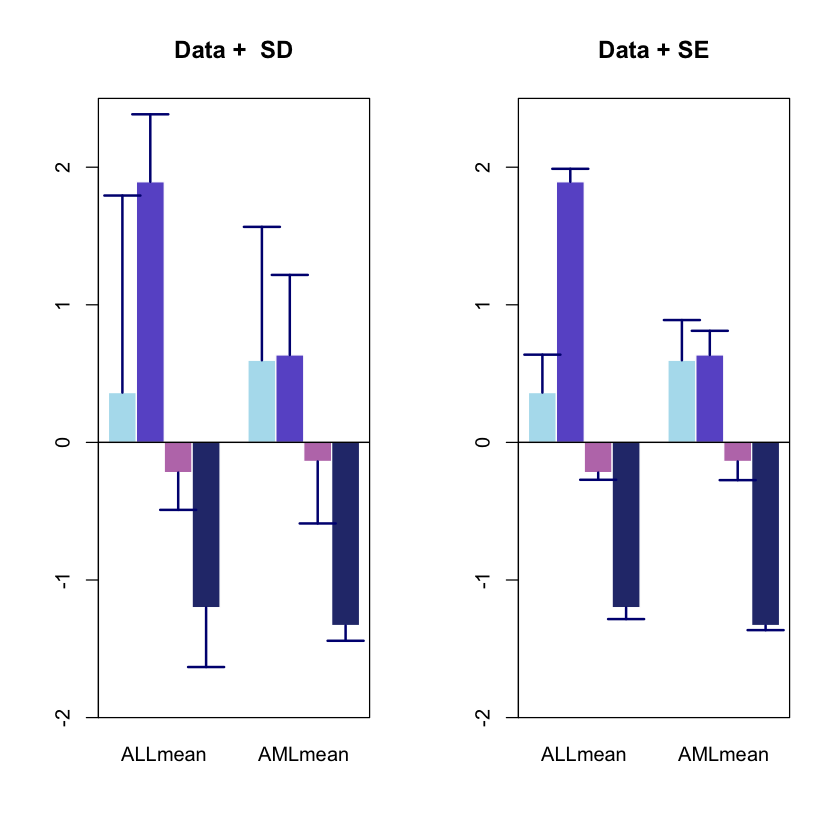

In [26]:
# creating a panel of 2 plots displayed in 1 row
par(mfrow = c(1,2))

# Plot with the SD
datasdend<-abs(dataheight) + abs(datasd)
datasdend[c(3,4),] = - datasdend[c(3,4),]
barx <- barplot(dataheight, beside=T, horiz=F, col = colours, ylim=c(-2,2.5),
               main = 'Data +  SD', border = 'white')
abline(a = 0 , b = 0, h = 0)
arrows(barx, dataheight, barx, datasdend, angle=90, lwd = 2, length = 0.15, 
       col = 'navyblue')
box()

# Plot with the se: error associated to the mean!
datasdend<-abs(dataheight) + abs(datase)
datasdend[c(3,4),] = -datasdend[c(3,4),]
barx <- barplot(dataheight, beside=T, horiz=F, col = colours, ylim=c(-2,2.5),
               main = 'Data + SE', border = 'white')
abline(a = 0 , b = 0, h = 0)
arrows(barx, dataheight, barx, datasdend, angle=90, lwd = 2, length = 0.15,
       col = 'navyblue')
box()

Note that the error bars for the SE are smaller than those for the SD. This is no coincidence! 

As we increase N (in the SE equation), we will decrease the error. Hence the standard error will **always** be smaller than the SD.

## 2. Data representation
This section presents some essential manners to display and visualize  data. 

### 2.1 Frequency table 
Discrete data occur when the values naturally fall into categories. A frequency table simply gives the number of occurrences within a category.

A gene consists of a sequence of nucleotides (A; C; G; T)

The number of each nucleotide can be displayed in a frequency table.

This will be illustrated by the Zyxin gene which plays an important role in cell adhesion The accession number (X94991.1) of one of its variants can be found in a data base like NCBI (UniGene). The code below illustrates how to read the sequence ”X94991.1” of the species homo sapiens from GenBank, to construct a
pie from a frequency table of the four nucleotides .

In [27]:
library('ape')


  a   c   g   t 
410 789 573 394 

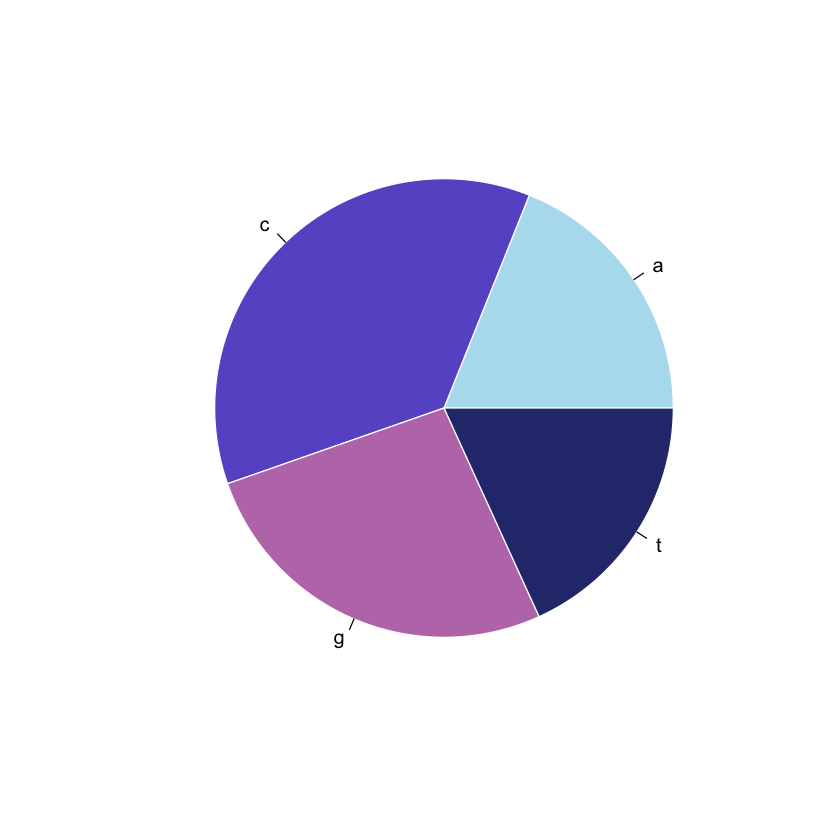

In [29]:
v = read.GenBank(c("X94991.1"),as.character = TRUE)

pie(table(v$X94991.1), col = colours, border = 'white')

# prints the data as a table 
table(read.GenBank(c("X94991.1"),as.character=TRUE))

### 2.2 Stripcharts

An elementary method to visualize data is by using a so-called stripchart,
by which the values of the data are represented as e.g. small boxes
it is useful in combination with a factor that distinguishes members from
different experimental conditions or patients groups.

Once again we use the CCND3 Cyclin D3 data to generate the plots.

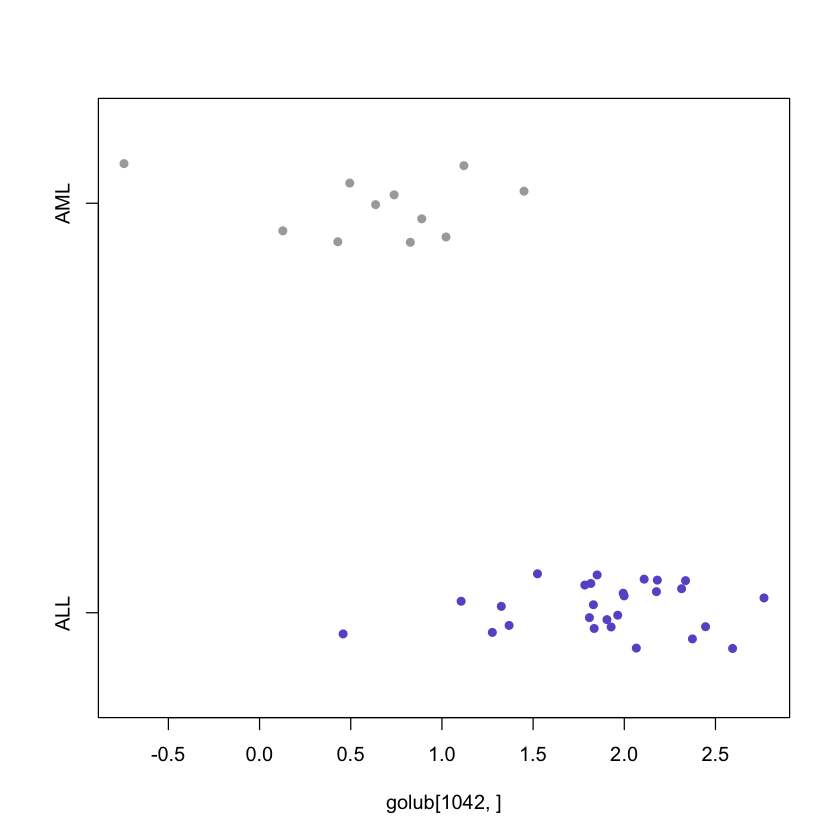

In [30]:
# data(golub, package = "multtest")
gol.fac <- factor(golub.cl,levels=0:1, labels= c("ALL","AML"))

stripchart(golub[1042,] ~ gol.fac, method = "jitter", 
           col = c('slateblue', 'darkgrey'), pch = 16)


From the above figure, it can be observed that the CCND3 Cyclin D3 expression values of the ALL patients tend to have larger expression values than those of the AML patient.


### 2.3 Histograms 

Another method to visualize data is by dividing the range of data values into
a number of intervals and to plot the frequency per interval as a bar. Such
a plot is called a histogram.

We will now generate a histogram of the expression values of gene CCND3 Cyclin D3 as well as all the genes for the AML and ALL patients contained in the Golub dataset.

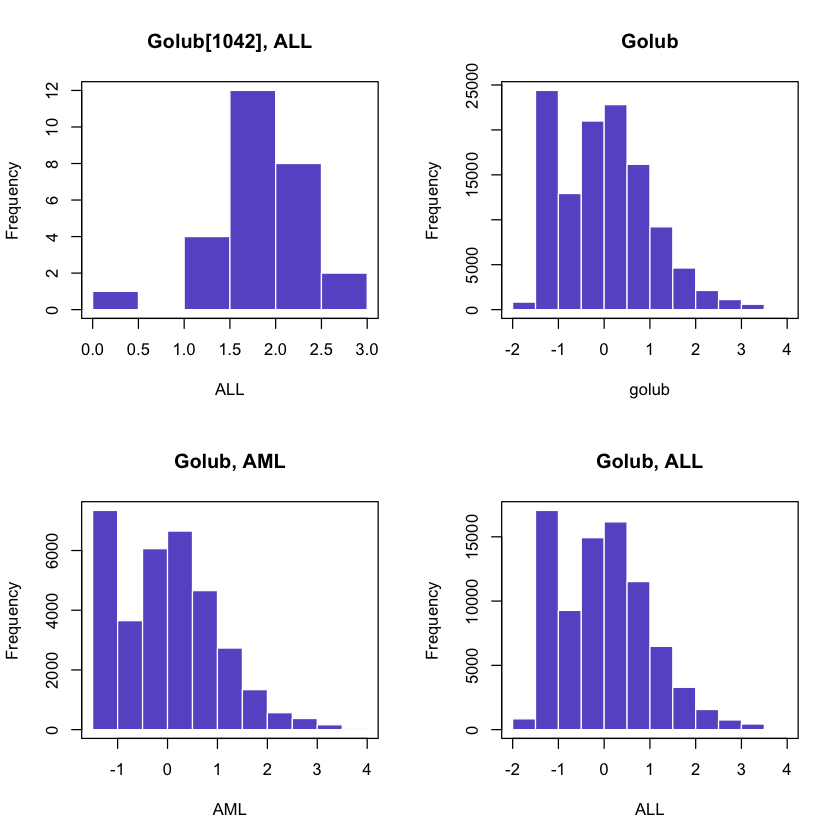

In [31]:
par(mfrow=c(2,2))

hist(golub[1042, gol.fac == "ALL"], 
     col = 'slateblue', border = 'white',
    main = 'Golub[1042], ALL', xlab = 'ALL')
box()

hist(golub,breaks = 10, 
    col = 'slateblue', border = 'white',
    main =  'Golub')
box()

hist(golub[, gol.fac == "AML"],breaks = 10, 
     col = 'slateblue', border = 'white',
    main = 'Golub, AML', xlab = 'AML')
box()

hist(golub[, gol.fac == "ALL"],breaks = 10,
     col = 'slateblue', border = 'white',
    main = 'Golub, ALL', xlab = 'ALL')
box()

### 2.3 Boxplots

A popular method to display data is by
drawing a box around the 1st and the 3rd quartile (a bold line segment                                                     for the median), and the smaller line segments (whiskers) for the smallest and
the largest data values. 

Such a data display is known as a box-and-whisker plot. 

We will start by creating a vector with gene expression values sorted in ascending order (using the `sort` function). 

In [32]:
# Sort the values of one gene
x <- sort(golub[1042, gol.fac=="ALL"], decreasing = FALSE)

# printing the first five values
x[1:5]

0       0       0       0       0 
0.45827 1.10546 1.27645 1.32551 1.36844

A view on the distribution of the gene expression values of the `ALL` and `AML` patients on gene CCND3 Cyclin D3 can be obtained by  generating two separate boxplots adjacent to each other:

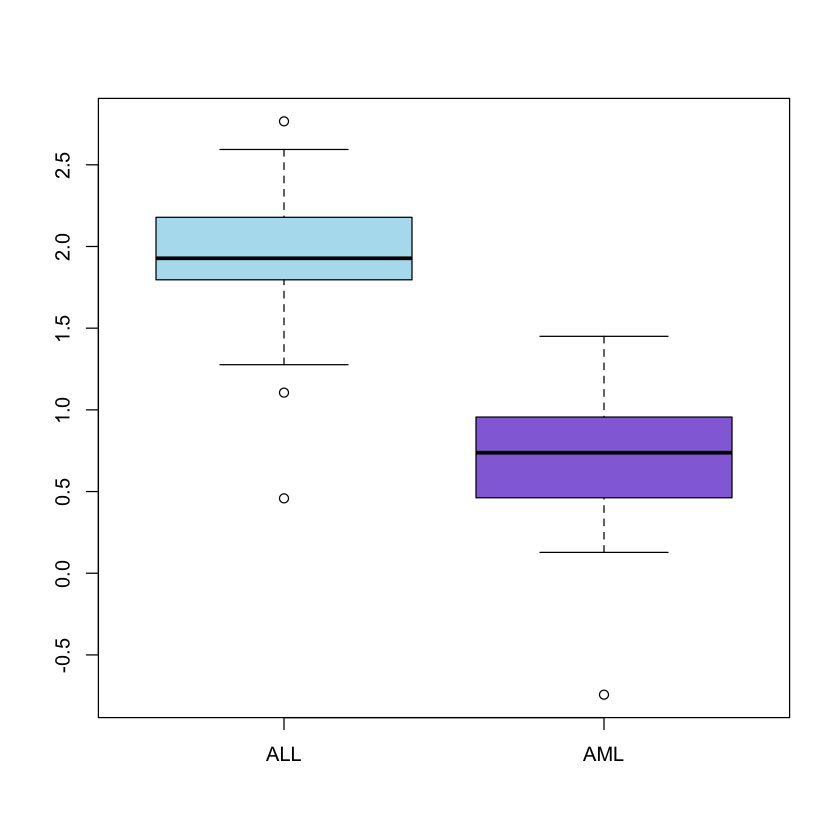

In [41]:
# Even though we are creating two boxplots we only need one major graph
par(mfrow=c(1,1))
boxplot(golub[1042,] ~ gol.fac, col = c('lightblue2', 'mediumpurple'))


It can be observed that the gene expression values for ALL are larger than those for AML. Furthermore, since the two sub-boxes around the median are more or less equally wide, the data are quite symmetrically distributed around the median.

We can create a histogram of the expression values of gene CCND3 Cyclin D3 of the acute lymphoblastic leukemia patients e.g.

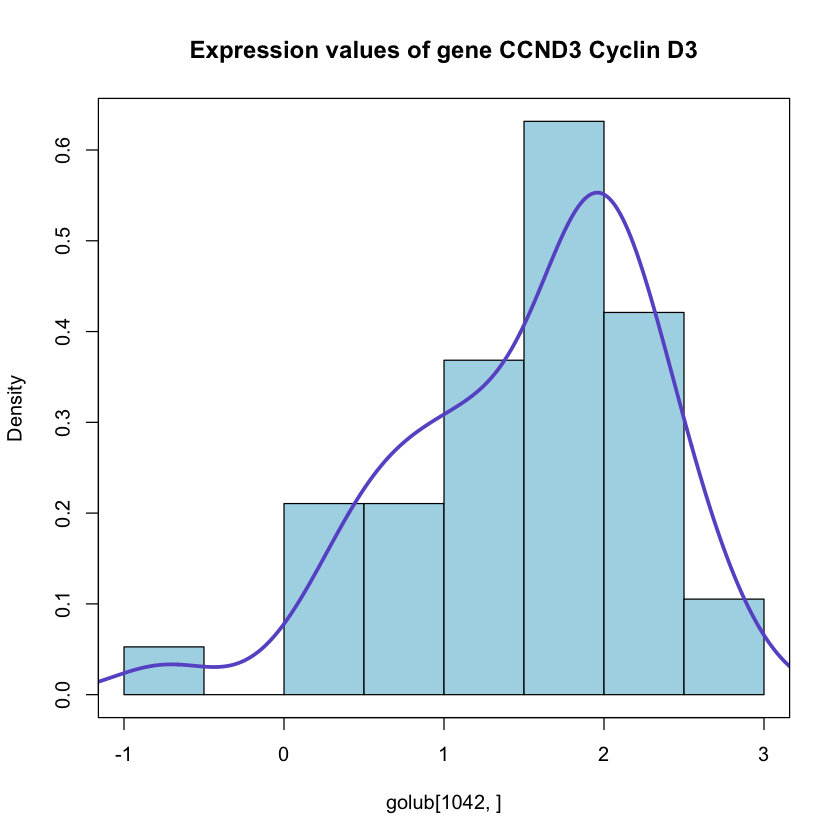

In [110]:
hist(golub[1042,], col= 'lightblue', border= 'black', breaks= 6, freq= F,
     main = 'Expression values of gene CCND3 Cyclin D3')
lines(density(golub[1042,]), col= 'slateblue', lwd = 3)
box()

Now we can observe the distribution of all gene expressions values in all 38 patients

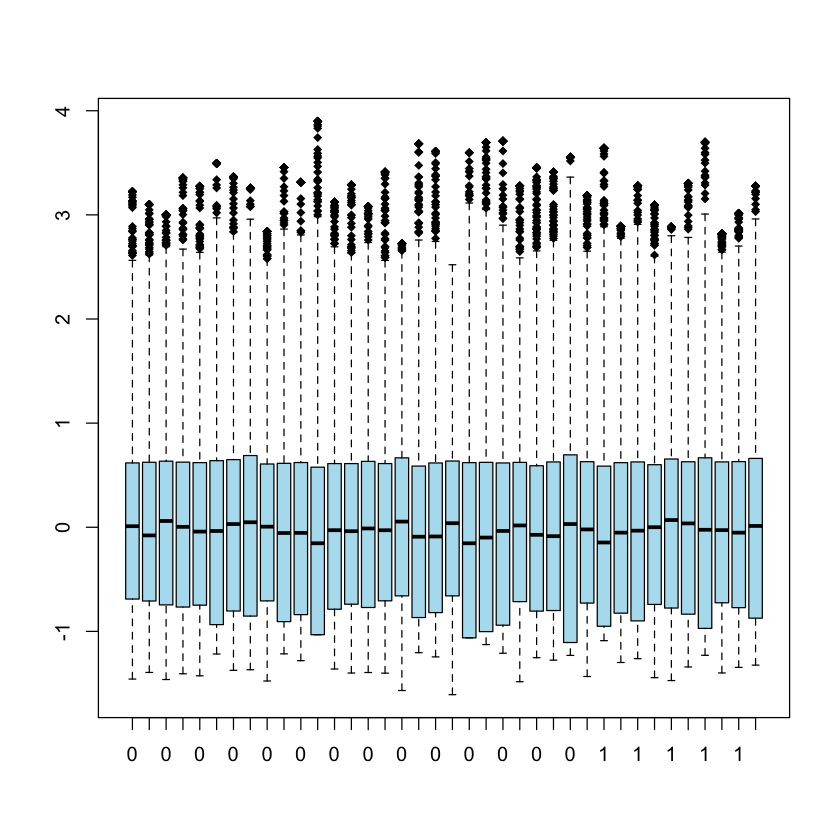

In [113]:
boxplot(golub, col= 'lightblue2', lwd = 1, border="black", pch=18)

To compute the exact values for the quartiles we need a sequence running from 0 to 1 with increments in steps of 0.25

In [114]:
pvec <- seq(0, 1, 0.25)
quantile(golub[1042, gol.fac=='ALL'], pvec)

0%      25%      50%      75%     100% 
0.458270 1.796065 1.927760 2.178705 2.766100

Outliers are data points lying far apart from the pattern set by the majority of the data values. The implementation in R of the boxplot draws such outliers as smalle circles. 

A data point `x` is defined (graphically, not statistically) as an outlier point if $$x < 0.25 x -1.5\left(0.75 x -0.25 x\right) [x>0.25x >1.5(0.75x-0.25x)]$$


### 2.4 Q-Q plots (Quantile-quantile plots)

A method to visualize the distribution of gene expression values is y the so-called quantile-quantile (Q-Q) plots. In such a plot the quantiles of the gene expression values are displayed against the corresponding quantiles of the normal distribution (bell-shaped).

A straight line is added to represent the points which
correspond exactly to the quantiles of the normal distribution. By observing
the extent in which the points appear on the line, it can be evaluated to
what degree the data are normally distributed. That is, the closer the gene
expression values appear to the line, the more likely it is that the data are
normally distributed.

To produce a Q-Q plot of the ALL gene expression values of CCND3 Cyclin D3 one may use the following.

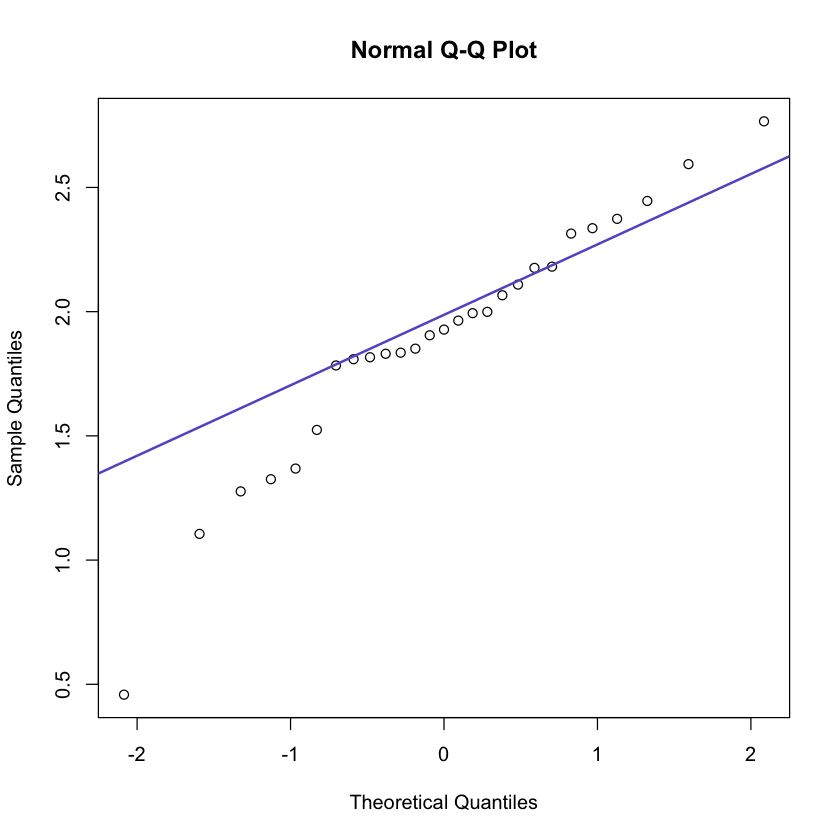

In [116]:
qqnorm(golub[1042, gol.fac == 'ALL'])
qqline(golub[1042, gol.fac == 'ALL'], col = 'slateblue', lwd = 2)

It can be seen that most of the data points are on or near the straight line, while a few others are further away. The above example illustrates a case where the degree of non-normality is moderate so that a clear conclusion cannot be drawn.


## 3. Loading tab-delimited data

In [117]:
mydata<-read.delim("./NeuralStemCellData.tab.txt", row.names=1, header=T)

In [118]:
class(mydata)

[1] "data.frame"

### Now try and do some exploratory analysis of your own on this data!


GvHD flow cytometry data

Only exract the CD3 positive cells


[1] 0.9560214

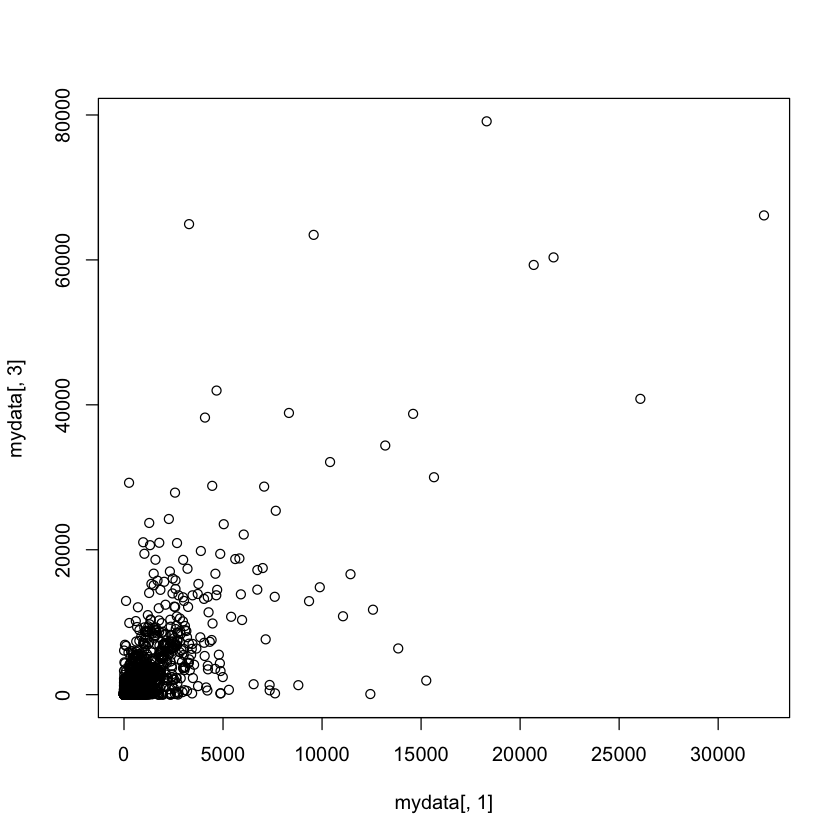

In [119]:
cor(mydata[,1],mydata[,2])
plot(mydata[,1],mydata[,3])